In [1]:
"""
RELEVANT LINKS:
https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
"""
import pandas as pd
import numpy as np
from concat_stations import concat_files
import data_prep
from rf_optimize import evaluate
from scipy import stats

import json
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [2]:
# Load data and concatenate stations
full_data = concat_files()

# Replcae NaNs with medians
full_data = data_prep.nan_to_median(full_data)

In [3]:
#data with features we want
new_full_data = full_data.drop(columns=['weekday','windMeanSpeed.m.s', 'windDirection.grades', 'windMaxSpeed.m.s','precipitation.l.m2', 'year', 'month'])

#list of features we want
df_features = [x for x in full_data.columns if x not in ['bikes','weekday','windMeanSpeed.m.s', 'windDirection.grades', 'windMaxSpeed.m.s','precipitation.l.m2', 'year', 'month']]


In [4]:
#standardization of features.
# Make target and feature arrays
y = np.array(new_full_data['bikes']) # array for target variable
X = new_full_data[df_features] # Features (discluding bikes)
X = np.array(X) # Turn into numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [5]:
# Make target and feature arrays
y = np.array(new_full_data[['bikes']]) # array for target variable
X = new_full_data[df_features] # Features (discluding bikes)
X = np.array(X) # Turn into numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [6]:
# now do the normalization.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #you must create two instances of the object.
sc_Y = StandardScaler()

#FIT the standard scaler
X_train = sc_X.fit_transform(X_train)
y_train = sc_Y.fit_transform(y_train)

In [7]:
print(X_train.shape, y_train.shape)

(41906, 17) (41906, 1)


In [29]:
params = {"max_depth":7, "min_samples_leaf":30, "min_samples_split":600, "n_estimators" : 1400, "random_state" :6, "subsample":0.6, "max_features" : 7, "learning_rate" : 0.1}

In [30]:
# Instantiate the model
reg = ensemble.GradientBoostingRegressor(**params)

# Fit the model (tuned model LRSS- has subsample split 0.7, 1400 and lr of 1400)
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mae = metrics.mean_absolute_error(y_test, sc_Y.inverse_transform(reg.predict(sc_X.transform(X_test))))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

The mean absolute error (MAE) on test set: 2.0941


In [31]:
test = pd.read_csv('/Users/xf20939/Desktop/ML Oli 3/iai_mlp/morebikes2020/test.csv')

In [32]:
submission_X = test[df_features]
submission = sc_Y.inverse_transform(reg.predict(sc_X.transform(submission_X)))
submissionDF = pd.DataFrame(submission, columns=['bikes'])


In [33]:
submissionDF.to_csv('submissionGBM2.csv')

In [ ]:
submissionDF.to_csv(c)

In [18]:
# Save model to local disk
import joblib
joblib.dump(reg, "tuned_GB_model_LRSS_FS.joblib")

['tuned_GB_model_LRSS_FS.joblib']

array([[ 2.01000000e+02,  3.94781781e+01, -3.83541125e-01, ...,
         3.83333333e+00,  4.00000000e+00,  3.83333333e+00],
       [ 2.01000000e+02,  3.94781781e+01, -3.83541125e-01, ...,
         2.08333333e+00, -6.66666667e-01,  2.08333333e+00],
       [ 2.01000000e+02,  3.94781781e+01, -3.83541125e-01, ...,
         1.95833333e+00, -2.33333333e+00,  1.95833333e+00],
       ...,
       [ 2.75000000e+02,  3.94502730e+01, -3.33362960e-01, ...,
         1.05000000e+01,  3.25000000e+00,  1.05000000e+01],
       [ 2.75000000e+02,  3.94502730e+01, -3.33362960e-01, ...,
         1.00000000e+01,  3.00000000e+00,  1.00000000e+01],
       [ 2.75000000e+02,  3.94502730e+01, -3.33362960e-01, ...,
         9.00000000e+00,  2.50000000e-01,  9.00000000e+00]])

The mean absolute error (MAE) on test set: 2.1295
[-2.55760205 -2.93887224 -2.77270517 -2.21220904 -1.88085854]
CV Score : Mean - -2.472449409223473 | Std - 0.3827948692721922 | Min - -2.938872242895012 | Max - -1.880858543560063


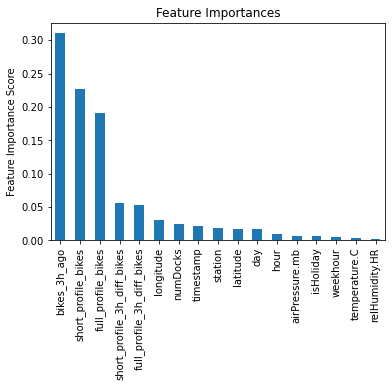

In [14]:
# Fit and test the model using cross val and the tuned paramters.
from sklearn.model_selection import cross_val_score
predictors = [x for x in new_full_data.columns if x not in ['bikes']]
gbm_tuned = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=1400,max_depth=7, min_samples_split=600,min_samples_leaf=30, subsample=0.6, random_state=10, max_features='sqrt')
modelfit(gbm_tuned, new_full_data, predictors)

In [ ]:
# IGNORE BELOW